In [30]:
import cv2
import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np
import math
from sklearn.model_selection import train_test_split
from pandas.io.parsers import read_csv
from skimage.color import rgb2gray
from tensorflow import keras 

In [31]:
#Load skin masks
indx = []
y = []
for i in range(400):
    masks = {
         '_l_brow.png', '_l_lip.png', '_mouth.png', '_nose.png', 
         '_r_eye.png', '_r_brow.png',
         '_u_lip.png', '_l_eye.png', 
         '_r_ear.png', '_l_ear.png', #ears
         #'_ear_r.png', # earrings
         '_neck_l.png', # necklace
         #'_hat.png', # hat
         '_neck.png' # neck
         #'_hair.png', # hair
         #'_cloth.png', # clothes
         #'_eye_g.png' # glasses
         #'_skin.png',
        }
    indx.append(i)
    j = math.trunc(i/2000)
    path_mask = '../CelebAMask-HQ/CelebAMask-HQ-mask-anno/'+str(j)+'/'+str(i).zfill(5)+'_skin.png'
    if os.path.isfile(path_mask):
            mask_total = cv2.imread(path_mask)
    for feature in masks:
        path_mask = '../CelebAMask-HQ/CelebAMask-HQ-mask-anno/'+str(j)+'/'+str(i).zfill(5)+feature
        if os.path.isfile(path_mask):
            mask_add = cv2.imread(path_mask)
        mask_total = cv2.add(mask_total,mask_add)
    mask=np.where(mask_total == 0, mask_total, 255)
    mask =   rgb2gray(mask)
    y.append(mask)

In [32]:
#Load Images
X = []
for i in range(len(indx)):
    path_image = '../CelebAMask-HQ/CelebA-HQ-img/'+str(indx[i])+'.jpg'
    img = cv2.imread(path_image)
    #img = rgb2gray(img)
    img = cv2.resize(img, (512,512))
    #img = img.flatten()
    X.append(img)

In [33]:
# convert to array
print(np.array(X).shape)
print(np.array(y).shape)
X = np.array(X)
y = np.array(y)

(400, 512, 512, 3)
(400, 512, 512)


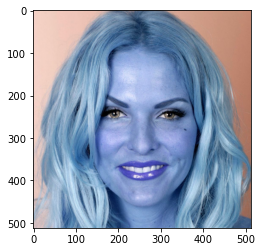

In [34]:
# Example
plt.figure(figsize=(4,4))
plt.imshow(X[234])

plt.show()


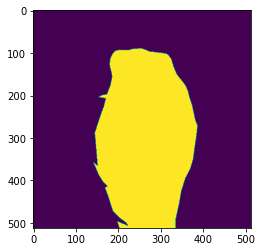

In [35]:
# Example
plt.figure(figsize=(4,4))
plt.imshow(y[234])

plt.show()

In [40]:
# Save images as .npy

#number of images in X
img_num = 400

print("original shape:", X.shape)
save_X = X.flatten('F').reshape((img_num,-1),order='F')
print("flatten done")
print(save_X.shape)
np.save('data_X.npy', save_X)
print("save as .npy done")


original shape: (400, 512, 512, 3)
flatten done
(400, 786432)
save as .npy done


In [37]:
#load images from .npy
load_X = np.load('data_X.npy')
print("load csv done")
load_X = load_X.reshape((img_num,512,512,3), order='F')
print("reshaping done")

print(load_X.shape)

load csv done
reshaping done
(400, 512, 512, 3)


In [41]:

# Save and load masks 

save_y = y.flatten('F').reshape((img_num,-1),order='F')
print("flatten done")
print(save_y.shape)
np.save('data_y.npy', save_y)
print("save as .npy done")
load_y = np.load('data_y.npy')
print("load csv done")
load_y = load_y.reshape((img_num,512,512), order='F')
print("reshaping done")

print(load_y.shape)

flatten done
(400, 262144)
save as .npy done
load csv done
reshaping done
(400, 512, 512)
